In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv('kaggle/train.csv')
test= pd.read_csv('kaggle/test.csv')

In [3]:
import warnings
warnings.filterwarnings(action= 'ignore')
from tqdm import tqdm_notebook

In [4]:
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [5]:
for k in train['age']:
    train['age']=train['age'].replace(k, int(k/10) *10)
    
for k in test['age']:
    test['age']=test['age'].replace(k, int(k/10) *10)

In [6]:
for k in train['hours-per-week']:
    train['hours-per-week']=train['hours-per-week'].replace(k, int(k/10) *10)
    
for k in test['age']:
    test['hours-per-week']=test['hours-per-week'].replace(k, int(k/10) *10)

In [7]:
'''원핫 인코딩 단독 실행시, 점수 하락으로 인해 라벨+원핫 인코딩 실행'''

'원핫 인코딩 단독 실행시, 점수 하락으로 인해 라벨+원핫 인코딩 실행'

In [8]:
'''feature_name = ['age', 'education-num', 'capital-gain','capital-loss', 'hours-per-week']
cat_feature = ['workclass', 'education', 'marital-status','occupation', 'sex']'''

"feature_name = ['age', 'education-num', 'capital-gain','capital-loss', 'hours-per-week']\ncat_feature = ['workclass', 'education', 'marital-status','occupation', 'sex']"

In [9]:
'''X_train = train[feature_name]
X_test = test[feature_name]
y_train = train['income']'''

"X_train = train[feature_name]\nX_test = test[feature_name]\ny_train = train['income']"

In [10]:
'''X_train_one_hot = pd.get_dummies(train[cat_feature])
X_train = pd.concat([X_train,X_train_one_hot],axis = 1)
X_test_one_hot = pd.get_dummies(test[cat_feature]) 
X_test = pd.concat([X_test,X_test_one_hot],axis = 1)'''

'X_train_one_hot = pd.get_dummies(train[cat_feature])\nX_train = pd.concat([X_train,X_train_one_hot],axis = 1)\nX_test_one_hot = pd.get_dummies(test[cat_feature]) \nX_test = pd.concat([X_test,X_test_one_hot],axis = 1)'

In [11]:
def bar_chart(feature):
    high = train[train['income']==1][feature].value_counts()
    low = train[train['income']==0][feature].value_counts()
    df = pd.DataFrame([high,low])
    df.index = ['High', 'low']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

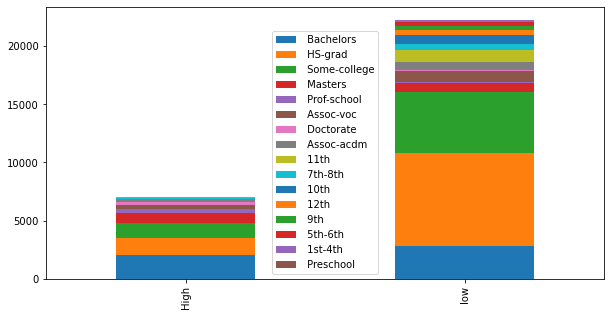

In [12]:
bar_chart('education')

In [13]:
'''라벨 인코딩'''


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train['workclass'])
labels = encoder.transform(train['workclass'])
train['workclass']= labels
encoder.fit(test['workclass'])
labels = encoder.transform(test['workclass'])
test['workclass']= labels
encoder.fit(train['education'])
labels = encoder.transform(train['education'])
train['education']= labels
encoder.fit(test['education'])
labels = encoder.transform(test['education'])
test['education']= labels
encoder.fit(train['education'])
labels = encoder.transform(train['education'])
train['education']= labels
encoder.fit(test['education'])
labels = encoder.transform(test['education'])
test['education']= labels
encoder.fit(train['sex'])
labels = encoder.transform(train['sex'])
train['sex']= labels
encoder.fit(test['sex'])
labels = encoder.transform(test['sex'])
test['sex']= labels

In [20]:
int_X_train= train[['age','education','capital-gain', 'capital-loss','hours-per-week','sex']]
int_X_test= test[['age','education','capital-gain','capital-loss','hours-per-week','sex']]
str_t= ['race','workclass','occupation','relationship','marital-status']
y_train = train['income']

In [21]:
'''원핫 인코딩'''
X_train_one_hot= pd.get_dummies(train[str_t])
X_test_one_hot= pd.get_dummies(test[str_t])
X_train= pd.concat([int_X_train,X_train_one_hot], axis= 1)
X_test= pd.concat([int_X_test,X_test_one_hot], axis= 1)

In [22]:
set(X_train.columns) - set(X_test.columns)

set()

In [23]:
set(X_test.columns) - set(X_train.columns)

set()

In [24]:
#X_train.sort_index(axis= 1, inplace= True)
#X_test.sort_index(axis= 1, inplace= True)

In [25]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

In [26]:
from sklearn.model_selection import cross_val_score

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

In [27]:
XGB = XGBClassifier(n_estimators = 1059, #총 트리의 개수
learning_rate= 0.22, # 약한 학습기들의 학습 정도
max_depth = 2, # 개별 트리의 깊이 
booster = 'gbtree',
reg_lambda=0.5, 
alpha=0.001, 
)
XGB.fit(X_train, y_train)
rs = cross_val_score(XGB, X_train, y_train, cv = 8)
rs.mean()

[19:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8716261014637106

### 0.871967333177759

In [ ]:
XGB_Pred = XGB.predict(X_test)

In [ ]:
submission = pd.read_csv('kaggle/sample_submission.csv')
submission['income'] = XGB_Pred
submission.to_csv('!01_20_저녁_테스트중.csv', index=False)